# Section Three - Linear Regression: Predict Median Living Costs
You know how to call the Linear Regression model, but why it works is a mystery. You can’t fix it when it doesn’t work. We bring you through an intuitive explanation of linear regression to solve your problem.

# Understanding Linear Regression

In [4]:
learning_rate = 0.01
fit_intercept = True
weights = 0

def fit(X, y):
    global weights
    
    if fit_intercept:
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    weights = np.zeros(X.shape[1])

    # gradient descent (there are other optimizations)
    for i in range(1000):  # epochs
        current_prediction = np.dot(X, weights)  # linear regression
        gradient = np.dot(X.T, (current_prediction - y)) / y.size  # find the gradient
        weights -= learning_rate * gradient  # modify the weights using the gradient

In [5]:
def predict_prob(X):
    global weights
    
    if fit_intercept:
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    return np.dot(X, weights)

# Implementing Linear Regression with scikit-learn


In [1]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [2]:
X = boston_data.data
y = boston_data.target

In [3]:
import pandas as pd
X_df = pd.DataFrame(X, columns=boston_data.feature_names)

In [4]:
X_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import numpy as np

In [7]:
len(y)

506

In [12]:
# Median value of owner-occupied homes in $1000's
np.average(y)

22.532806324110677

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.distplot(y)

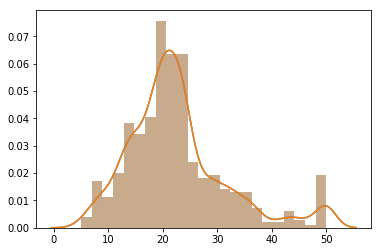

In [19]:
plt.show()

# Troubleshooting Linear Regression

In [21]:
from sklearn.metrics import mean_squared_error

In [23]:
y_pred = [0] * 506

In [24]:
mean_squared_error(y, y_pred)

592.1469169960474

In [32]:
def manual_model(house):
    return (house[5] - 4) * 10

In [33]:
y_pred = [manual_model(x) for x in X]

In [34]:
mean_squared_error(y, y_pred)

44.09607252964427

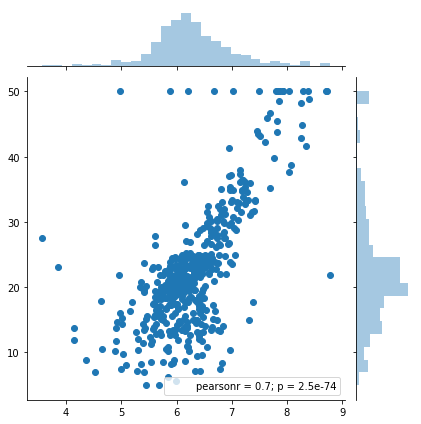

In [29]:
sns.jointplot(X[:, 5], y)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred_ml = model.predict(X_test)

In [41]:
mean_squared_error(y_test, y_pred_ml)

20.747143360308918

In [42]:
model_2 = LinearRegression(normalize=True)

In [43]:
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [44]:
y_pred_ml_normalized = model_2.predict(X_test)

In [45]:
mean_squared_error(y_test, y_pred_ml_normalized)

20.74714336030884